<a href="https://colab.research.google.com/github/pesricha/chance-of-admission/blob/main/Chance_of_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/gdrive/MyDrive/Jiisa/admission_data.csv')
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
#check for NULLS
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
from collections import Counter

def detect_outliers(df,n,features):
    '''
    takes a dataframe df of ffeatures to return a list of indices
    where the number of outliers are more than n using the Tukeys Method
    '''

    outlier_indices = []

    #iterating over features
    for col in features:
        
        #1 1st quartile 25%
        Q1 = np.percentile(df[col], 25)

        #2 3rd quartile 75%
        Q3 = np.percentile(df[col], 75)

        #3 interquartile range
        IQR = Q3-Q1

        #outlier step
        outlier_step = 1.5*IQR

        #list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        #append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    #select observations with more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)

    return multiple_outliers

outliers_to_drop = detect_outliers(df,2,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research'])
        
df.loc[outliers_to_drop]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


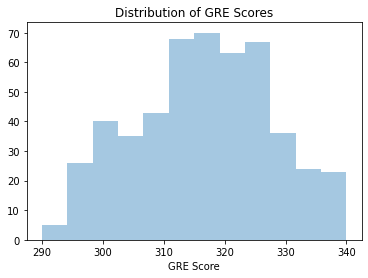

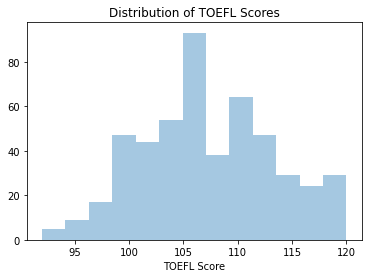

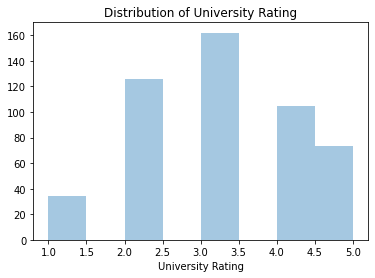

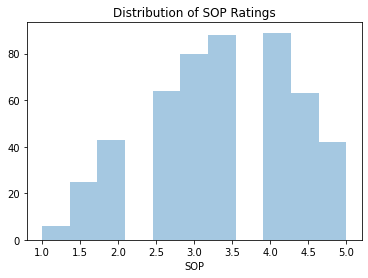

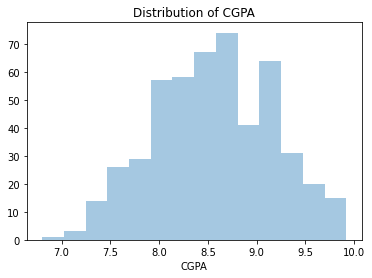

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.distplot(df['GRE Score'] , kde = False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'] , kde  = False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()



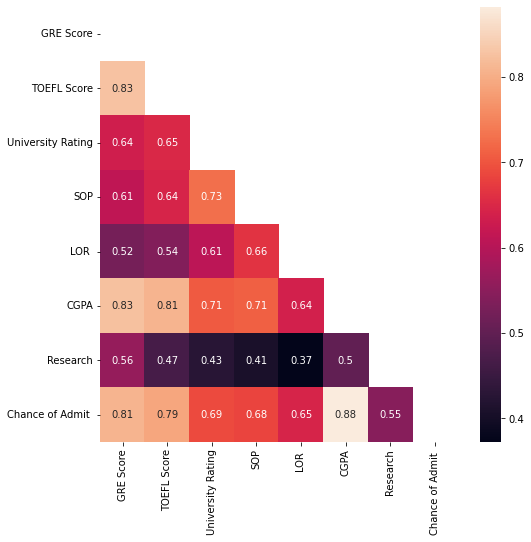

In [ ]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8)) #size
dropSelf = np.zeros_like(corr) 
dropSelf[np.triu_indices_from(dropSelf)] = True #diagonal drop
sns.heatmap(corr , annot = True ,mask= dropSelf)
plt.show()

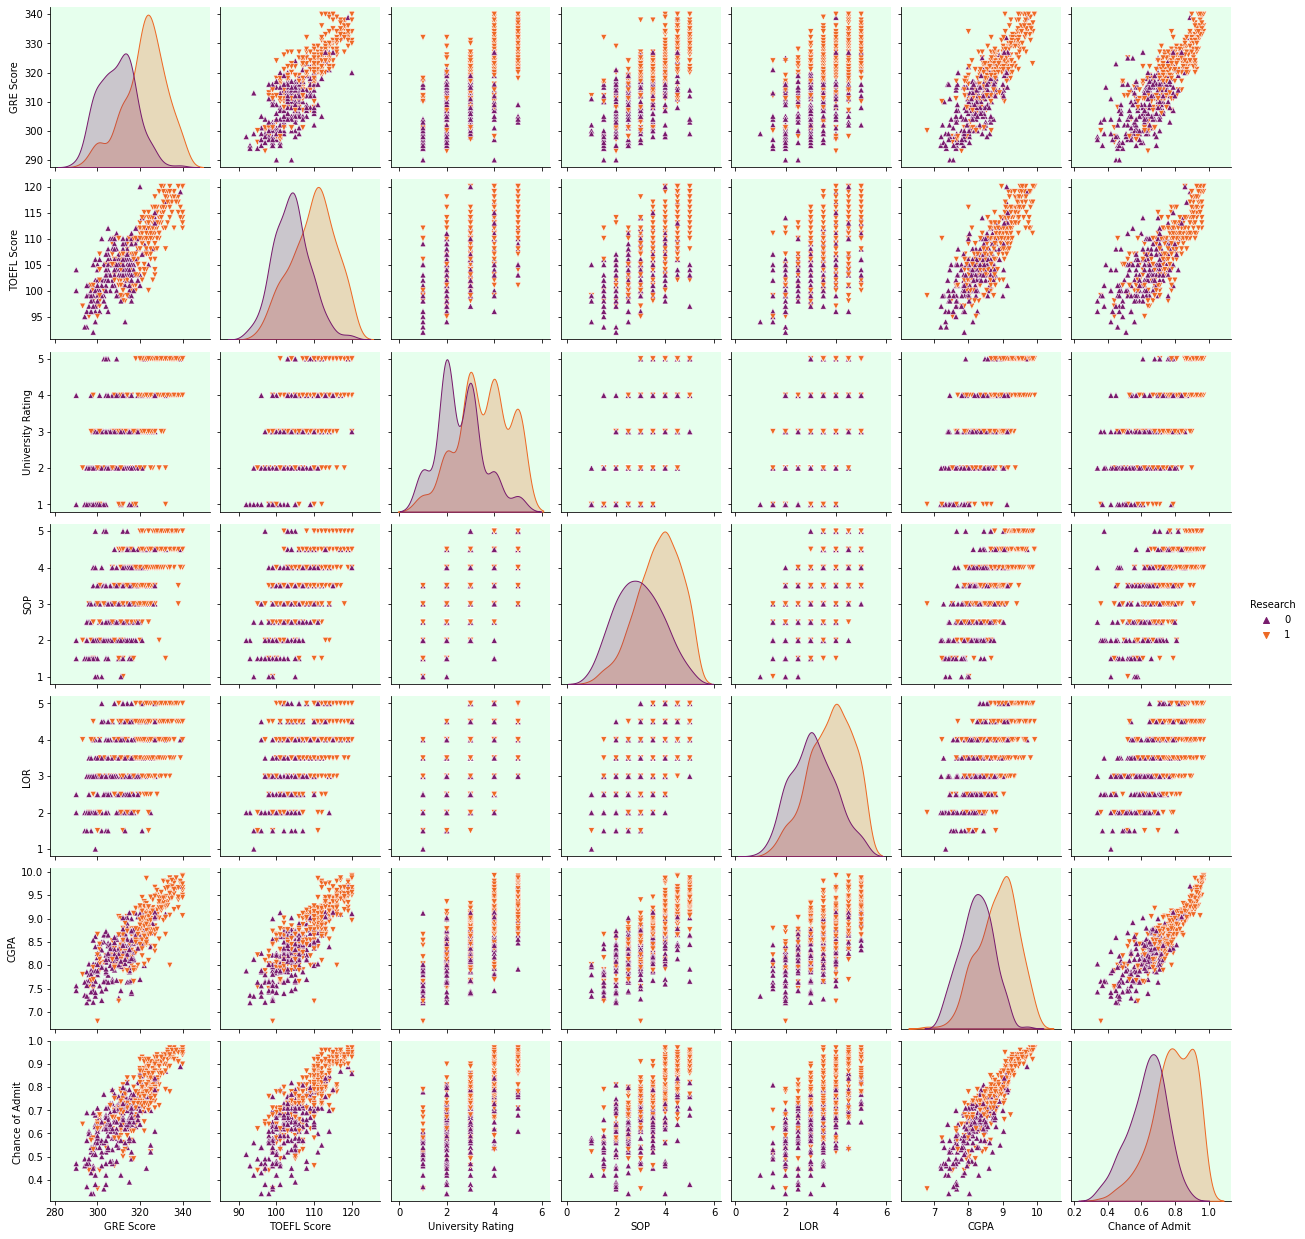

In [ ]:
## pairplot
plt.rcParams['axes.facecolor'] = "#e6ffed"
#plt.rcParams['figure.facecolor'] = "#e6ffed"
g = sns.pairplot(data = df , hue  = 'Research' , markers = ['^' , 'v'] , palette='inferno')

In [ ]:
print("Average GRE Score :{0:.3f} out of 340".format(df['GRE Score'].mean()))
print('Average TOEFL Score:{0:.3f} out of 120'.format(df['TOEFL Score'].mean()))
print('Average CGPA:{0:.3f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.3f}%'.format(df['Chance of Admit '].mean()*100))

Average GRE Score :316.472 out of 340
Average TOEFL Score:107.192 out of 120
Average CGPA:8.576 out of 10
Average Chance of getting admitted:72.174%


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '] , axis =1)
y = df["Chance of Admit "]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , shuffle = False)



In [ ]:
from sklearn.svm import SVR  #import supportvectorregression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

LR = LinearRegression()
LR.fit(X_train , y_train)
y_pred = LR.predict(X_test)
score = r2_score(y_test, y_pred)

print('r2 score is', score)
print('mean_squared error is:', mean_squared_error(y_test, y_pred))
print('root_mean_squared error of is:', np.sqrt(mean_squared_error(y_test, y_pred)))

SVM = SVR()
SVM.fit(X_train , y_train)
y_pred = SVM.predict(X_test)
score = r2_score(y_test,y_pred)

print('r2 score is', score)
print('mean_squared error is:', mean_squared_error(y_test, y_pred))
print('root_mean_squared error of is:', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is 0.8982869098533861
mean_squared error is: 0.0018431744376047362
root_mean_squared error of is: 0.04293220746251858
r2 score is 0.7035045252614958
mean_squared error is: 0.005372886411333602
root_mean_squared error of is: 0.07329997552068897


            Features  Importance
6           Research    0.011222
2  University Rating    0.014010
4               LOR     0.023777
3                SOP    0.026012
1        TOEFL Score    0.038523
0          GRE Score    0.072545
5               CGPA    0.813910


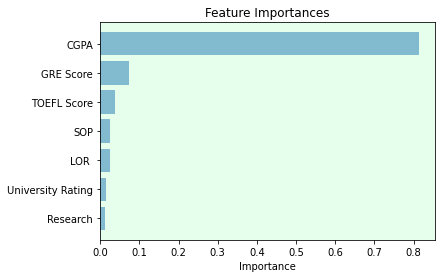

In [ ]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

print(importance_frame)

plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5, )
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()